TechnoHacks EduTech Internship

Intern : Pradnya Ramdas Patil

Task 7 : Churn Prediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\SURVESH\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


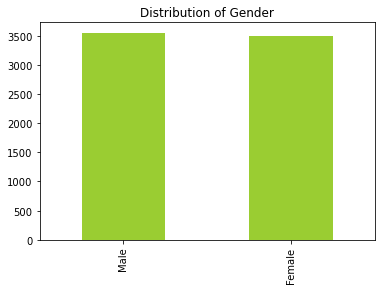

In [8]:
import matplotlib.pyplot as plt
df['gender'].value_counts().plot.bar(color='yellowgreen')
plt.title("Distribution of Gender");

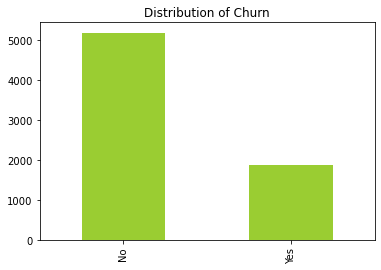

In [9]:
df['Churn'].value_counts().plot.bar(color='yellowgreen')
plt.title("Distribution of Churn");

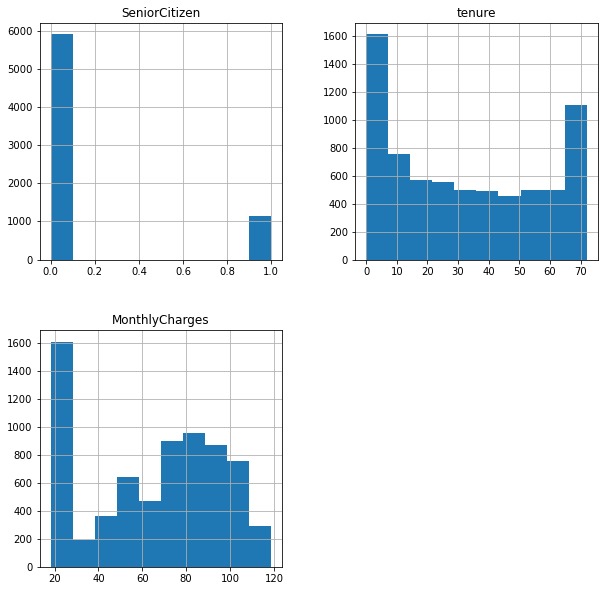

In [10]:
df.hist(figsize=(10,10));

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

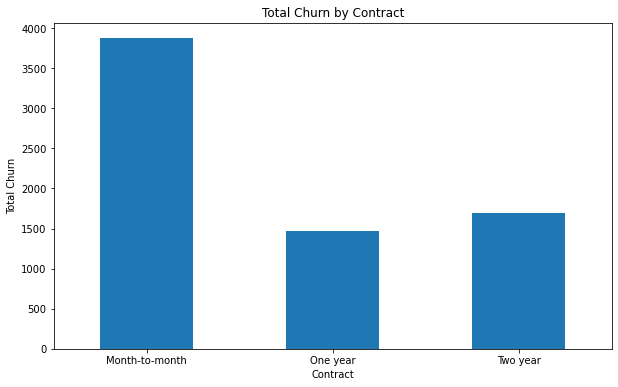

In [11]:
df_groups=df.groupby(['Contract'])['Churn'].count()
df_groups.plot(kind='bar',title='Total Churn by Contract',
               ylabel='Total Churn', xlabel='Contract', figsize=(10, 6))

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

In [12]:
#Heapmap
data=df.drop(["gender","customerID"],axis=1,)
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
#correlation
correlation_matrix=data.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

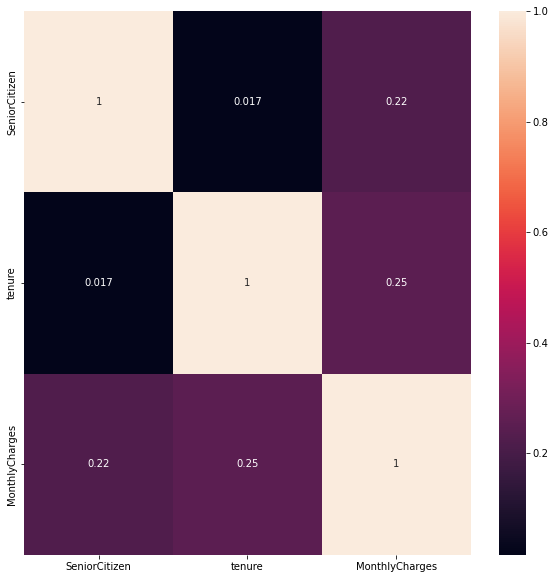

In [14]:
import seaborn as sns
plt.figure(figsize=(10,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

In [15]:
#To code the categorical outcome Churn which is a dependent variable by using Label Encoder.
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Churn']=label_encoder.fit_transform(data["Churn"])
data["Churn"].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [16]:
#To code the categorical independent variables using dummy variables
data1=pd.get_dummies(data,drop_first=True)
data1.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x = data1.drop(['Churn'], axis=1)
y = data1['Churn']

In [18]:
x

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [22]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=21)
print('x train.size:',len(x_train))
print('x test.size:',len(x_test))
print('y train size:',len(y_train))
print('y test size:',len(y_test))

x train.size: 5634
x test.size: 1409
y train size: 5634
y test size: 1409


In [23]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


In [24]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
#Using SMOTE Technique
from imblearn.over_sampling import SMOTE
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

In [26]:
y_train.value_counts()

1    4139
0    4139
Name: Churn, dtype: int64

The technique has created the synthetic samples so that the target variable is completely balanced and we can perform further analysis.

### Logistic Regression

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [28]:
#Logistic Regression fit a model
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
import warnings
warnings.filterwarnings('ignore')

C:\Users\SURVESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#predict for x dataset
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [30]:
# Dataframe of actual and predicted data
y_pred_df=pd.DataFrame({'actual': y_test,'predicted': classifier.predict(x_test)})
y_pred_df

,actual,predicted
6091,1,1
745,0,0
5130,1,1
5616,0,0
6647,0,0
...,...,...
5477,0,0
4065,1,0
3683,0,0
3622,0,0


In [31]:
y_pred_df[20:50]

,actual,predicted
1818,0,1
555,0,0
6352,0,0
6364,0,0
148,0,0
6348,0,1
2688,1,1
5164,0,1
4734,1,0
5270,1,0


In [32]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
y_pred_df['correct']


6091     True
745      True
5130     True
5616     True
6647     True
        ...  
5477     True
4065    False
3683     True
3622     True
2881     True
Name: correct, Length: 1409, dtype: bool

In [33]:
y_pred_df['correct'].mean()
#y_pred_df['correct'].value_counts()

0.7402413058907026

Churn prediction correctly predicted 74% by using Logistic Regression.